1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=3.5, 
                                      coef=True, 
                                      random_state=66)
coef

array([33.97406739,  3.76990266])

In [3]:
def calc_mse(y:float, y_pred:float):
    return np.mean((y - y_pred) ** 2)

In [4]:
def eval_GD(X, y, iterations, eta=1e-4):
    err_list = []
    np.random.seed(66)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        err_list.append(err)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err_list

In [5]:
def eval_SGD(X, y, iterations, eta=1e-4):
    err_list = []
    np.random.seed(66)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        err_list.append(err)
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err_list

In [6]:
iterations = 2000

In [7]:
w1, err_list1 = eval_GD(X, y, iterations, 1e-3)

200: weights=[12.61894447  0.57985881], MSE=513.341
400: weights=[20.00053431  1.68068374], MSE=229.931
600: weights=[24.86406789  2.40849524], MSE=106.879
800: weights=[28.06851523  2.88972757], MSE=53.453
1000: weights=[30.17983274  3.20794693], MSE=30.256
1200: weights=[31.57091601  3.41839022], MSE=20.185
1400: weights=[32.4874569   3.55757154], MSE=15.812
1600: weights=[33.09133557  3.64963027], MSE=13.913
1800: weights=[33.48921055  3.71052614], MSE=13.089
2000: weights=[33.75135619  3.7508118 ], MSE=12.731


In [8]:
w2, err_list2 = eval_SGD(X, y, iterations, 1e-3)

200: weights=[13.35933635  1.22556048], MSE=478.937
400: weights=[20.15356258  2.25279048], MSE=222.335
600: weights=[25.38236812  2.72664108], MSE=95.964
800: weights=[28.41814035  3.13216432], MSE=48.530
1000: weights=[30.34532069  3.09710249], MSE=28.994
1200: weights=[31.819669    3.40616337], MSE=19.088
1400: weights=[32.57143644  3.50264237], MSE=15.529
1600: weights=[33.17792532  3.70679871], MSE=13.686
1800: weights=[33.59397618  3.74066737], MSE=12.920
2000: weights=[33.70836976  3.85686212], MSE=12.773


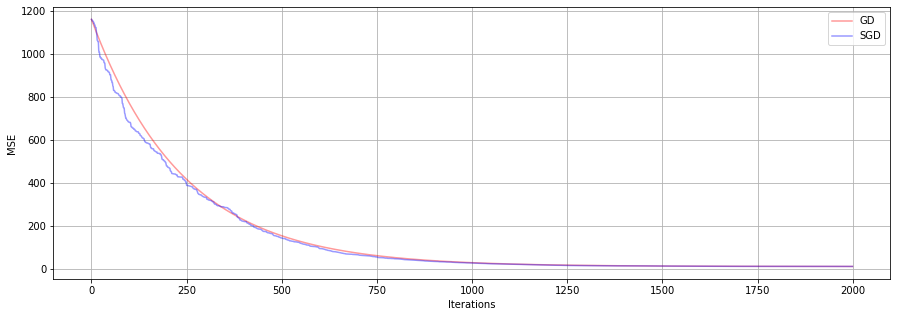

In [9]:
n_iter = np.arange(len(err_list1))
plt.figure(figsize=(15, 5))
plt.plot(n_iter, err_list1, 'r', label='GD', alpha=0.4)
plt.plot(n_iter, err_list2, 'b', label='SGD', alpha=0.4)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

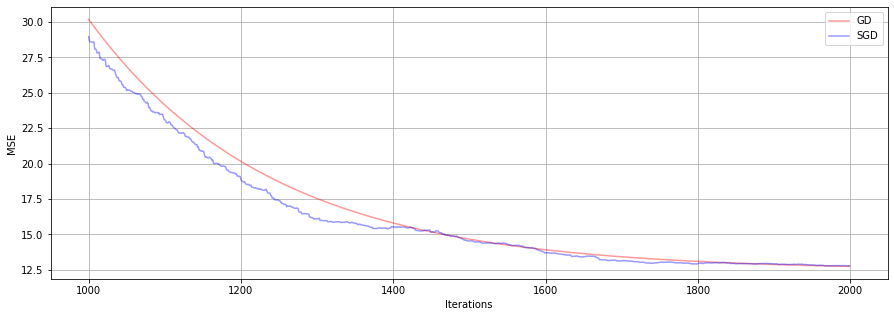

In [10]:
half = iterations // 2
err_list1 = err_list1[half:]
err_list2 = err_list2[half:]
n_iter = np.arange(half, len(err_list1) * 2,)
plt.figure(figsize=(15, 5))
plt.plot(n_iter, err_list1, 'r', label='GD', alpha=0.4)
plt.plot(n_iter, err_list2, 'b', label='SGD', alpha=0.4)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

Значимых различий в скорости сходимости между обычным и стохастическим градиентным спуском не наблюдается.